<h2>Lección 6</h2>

<h3>Ejemplo de creación de un índice jerárquico</h3>

In [74]:
import pandas as pd

# Crear un DataFrame
datos = {'Región': ['Norte', 'Norte', 'Sur', 'Sur'],
         'Ciudad': ['A', 'B', 'A', 'B'],
         'Ventas': [100, 150, 200, 250]}

df = pd.DataFrame(datos)
df

,Región,Ciudad,Ventas
0,Norte,A,100
1,Norte,B,150
2,Sur,A,200
3,Sur,B,250


In [75]:
# Definir un índice jerárquico
df.set_index(['Región', 'Ciudad'], inplace=True)
df

Ventas
Región Ciudad        
Norte  A          100
       B          150
Sur    A          200
       B          250

<h3>Acceso a datos con índice jerárquico</h3>
<p>Esto permite acceder a los datos de manera estructurada, facilitando la selección de subconjuntos específicos mediante los diferentes niveles del índice.</p>

In [76]:
df.loc["Norte"]

,Ventas
Ciudad,
A,100
B,150


<h3>Ejemplo de uso de groupby()</h3>

In [77]:
import pandas as pd

# Crear un DataFrame
df = pd.DataFrame({'Departamento': ['Ventas', 'Ventas', 'TI', 'TI'],
                   'Empleado': ['Ana', 'Luis', 'Carlos', 'Sofía'],
                   'Salario': [50000, 54000, 60000, 62000]})
df

,Departamento,Empleado,Salario
0,Ventas,Ana,50000
1,Ventas,Luis,54000
2,TI,Carlos,60000
3,TI,Sofía,62000


In [78]:
# Agrupar por Departamento y calcular el salario promedio
df_grouped = df.groupby('Departamento')['Salario'].mean()
df_grouped

Departamento
TI        61000.0
Ventas    52000.0
Name: Salario, dtype: float64

<h3>Ejemplo de uso de .agg() para múltiples funciones</h3>

<p>.agg() permite aplicar múltiples funciones agregadas a cada grupo y obtener un resumen más completo en una sola operación.</p>

In [79]:
df

,Departamento,Empleado,Salario
0,Ventas,Ana,50000
1,Ventas,Luis,54000
2,TI,Carlos,60000
3,TI,Sofía,62000


In [80]:
# Agrupamos por 'Departamento' y calculamos media, máximo y mínimo del 'Salario'
df_grouped = df.groupby('Departamento').agg({'Salario': ['mean', 'max', 'min']})

df_grouped

Salario              
                 mean    max    min
Departamento                       
TI            61000.0  62000  60000
Ventas        52000.0  54000  50000

<h3>Ejemplo de pivotado de datos</h3>

In [81]:
import pandas as pd

# Crear un DataFrame
df = pd.DataFrame({'Fecha': ['2023-01', '2023-01', '2023-02', '2023-02'],
                   'Ciudad': ['A', 'B', 'A', 'B'],
                   'Ventas': [100, 150, 200, 250]})
df

,Fecha,Ciudad,Ventas
0,2023-01,A,100
1,2023-01,B,150
2,2023-02,A,200
3,2023-02,B,250


In [82]:
# Pivotar el DataFrame
df_pivotado = df.pivot(index='Fecha', columns='Ciudad', values='Ventas')
df_pivotado

Ciudad,A,B
Fecha,,
2023-01,100,150
2023-02,200,250


<h3>Ejemplo de uso de melt()</h3>

In [83]:
df_pivotado

Ciudad,A,B
Fecha,,
2023-01,100,150
2023-02,200,250


In [84]:
# Despivotar el DataFrame (de formato "ancho" a "largo" usando melt)
df_melt = df_pivotado.reset_index().melt(id_vars='Fecha', 
                                         var_name='Ciudad', 
                                         value_name='Ventas')
print("DataFrame Despivotado (Melt):")
df_melt

DataFrame Despivotado (Melt):


,Fecha,Ciudad,Ventas
0,2023-01,A,100
1,2023-02,A,200
2,2023-01,B,150
3,2023-02,B,250


<h3>Ejemplo de concatenación de DataFrames</h3>

In [85]:
import pandas as pd

# Crear dos DataFrames
df1 = pd.DataFrame({'ID': [1, 2, 3], 'Valor': [100, 200, 300]})
df2 = pd.DataFrame({'ID': [4, 5, 6], 'Valor': [400, 500, 600]})

# Concatenar los DataFrames
df_concatenado = pd.concat([df1, df2])
df_concatenado

,ID,Valor
0,1,100
1,2,200
2,3,300
0,4,400
1,5,500
2,6,600


<h2>Parte 2 </h2>

<h3>Ejemplo de uso de merge()</h3>
El método merge() permite combinar dos DataFrames en base a una clave común, similar a una unión en bases de datos SQL.

In [86]:
import pandas as pd

# Crear dos DataFrames
df1 = pd.DataFrame({'ID': [1, 2, 3], 'Nombre': ['Ana', 'Luis', 'Carlos']})
df2 = pd.DataFrame({'ID': [1, 2, 4], 'Salario': [50000, 54000, 60000]})

In [87]:
df1

,ID,Nombre
0,1,Ana
1,2,Luis
2,3,Carlos


In [88]:
df2

,ID,Salario
0,1,50000
1,2,54000
2,4,60000


In [89]:
# Realizar un merge por la columna 'ID'
df_merged = pd.merge(df1, df2, on='ID', how='inner')
df_merged

,ID,Nombre,Salario
0,1,Ana,50000
1,2,Luis,54000


<h3>Ejemplo práctico: Análisis de ventas y clientes</h3>

In [90]:
import pandas as pd

# 1. Dataset de Ventas (Contiene el Monto y el ID del cliente)
ventas = pd.DataFrame({
    'ID_Venta': [101, 102, 103, 104, 105, 106, 107, 108],
    'ID_Cliente': [1, 2, 1, 3, 2, 4, 1, 5],
    'Monto': [150.50, 200.00, 50.25, 300.00, 120.00, 450.00, 100.00, 210.00]
})

# 2. Dataset de Clientes (Contiene la Región vinculada al ID_Cliente)
clientes = pd.DataFrame({
    'ID_Cliente': [1, 2, 3, 4, 5],
    'Nombre': ['Ana', 'Luis', 'Carlos', 'Sofía', 'Jorge'],
    'Región': ['Norte', 'Sur', 'Norte', 'Este', 'Sur']
})

In [91]:
ventas

,ID_Venta,ID_Cliente,Monto
0,101,1,150.50
1,102,2,200.00
2,103,1,50.25
3,104,3,300.00
4,105,2,120.00
5,106,4,450.00
6,107,1,100.00
7,108,5,210.00


In [92]:
clientes

,ID_Cliente,Nombre,Región
0,1,Ana,Norte
1,2,Luis,Sur
2,3,Carlos,Norte
3,4,Sofía,Este
4,5,Jorge,Sur


In [93]:
# Combinar los DataFrames
df_combinado = pd.merge( ventas,  clientes,  on='ID_Cliente',  how='left')
df_combinado

,ID_Venta,ID_Cliente,Monto,Nombre,Región
0,101,1,150.50,Ana,Norte
1,102,2,200.00,Luis,Sur
2,103,1,50.25,Ana,Norte
3,104,3,300.00,Carlos,Norte
4,105,2,120.00,Luis,Sur
5,106,4,450.00,Sofía,Este
6,107,1,100.00,Ana,Norte
7,108,5,210.00,Jorge,Sur


In [94]:
# Agrupar por región y calcular estadísticas
analisis_region = df_combinado.groupby('Región').agg({ 'Monto': ['sum', 'mean', 'count'], 'ID_Cliente': 'nunique'})
analisis_region

Monto                   ID_Cliente
           sum        mean count    nunique
Región                                     
Este    450.00  450.000000     1          1
Norte   600.75  150.187500     4          2
Sur     530.00  176.666667     3          2

<h3>Implementación del caso de estudio</h3>

In [95]:
# 1. Dataset de PRODUCTOS
productos = pd.DataFrame({
    'ID_Producto': [10, 11, 12, 13],
    'Nombre_Producto': ['Laptop', 'Smartphone', 'Silla Oficina', 'Escritorio'],
    'Categoría': ['Electrónica', 'Electrónica', 'Muebles', 'Muebles']
})

# 2. Dataset de VENTAS
ventas = pd.DataFrame({
    'ID_Venta': [1, 2, 3, 4, 5, 6, 7, 8],
    'ID_Producto': [10, 11, 10, 12, 13, 11, 10, 12],
    'ID_Cliente': [1, 2, 3, 1, 2, 3, 1, 2],
    'Monto': [1200, 800, 1150, 300, 450, 850, 1200, 320]
})

# 3. Dataset de CLIENTES
clientes = pd.DataFrame({
    'ID_Cliente': [1, 2, 3],
    'Nombre_Cliente': ['Juan', 'Maria', 'Pedro'],
    'Región': ['Norte', 'Sur', 'Centro']
})

In [96]:
# 1. Combinar tablas
df_completo = pd.merge(ventas, productos, on='ID_Producto')
df_completo

,ID_Venta,ID_Producto,ID_Cliente,Monto,Nombre_Producto,Categoría
0,1,10,1,1200,Laptop,Electrónica
1,2,11,2,800,Smartphone,Electrónica
2,3,10,3,1150,Laptop,Electrónica
3,4,12,1,300,Silla Oficina,Muebles
4,5,13,2,450,Escritorio,Muebles
5,6,11,3,850,Smartphone,Electrónica
6,7,10,1,1200,Laptop,Electrónica
7,8,12,2,320,Silla Oficina,Muebles


In [97]:
df_completo = pd.merge(df_completo, clientes, on='ID_Cliente')
df_completo

,ID_Venta,ID_Producto,ID_Cliente,Monto,Nombre_Producto,Categoría,Nombre_Cliente,Región
0,1,10,1,1200,Laptop,Electrónica,Juan,Norte
1,2,11,2,800,Smartphone,Electrónica,Maria,Sur
2,3,10,3,1150,Laptop,Electrónica,Pedro,Centro
3,4,12,1,300,Silla Oficina,Muebles,Juan,Norte
4,5,13,2,450,Escritorio,Muebles,Maria,Sur
5,6,11,3,850,Smartphone,Electrónica,Pedro,Centro
6,7,10,1,1200,Laptop,Electrónica,Juan,Norte
7,8,12,2,320,Silla Oficina,Muebles,Maria,Sur


In [98]:
# 2. Agrupar por categoría y región
analisis = df_completo.groupby(['Categoría', 'Región']).agg({ 'Monto': ['sum', 'mean'], 'ID_Venta': 'count'}).reset_index()
analisis

Categoría  Región Monto         ID_Venta
                         sum    mean    count
0  Electrónica  Centro  2000  1000.0        2
1  Electrónica   Norte  2400  1200.0        2
2  Electrónica     Sur   800   800.0        1
3      Muebles   Norte   300   300.0        1
4      Muebles     Sur   770   385.0        2

In [99]:
# 3. Pivotar para crear reporte por región
reporte_regiones = analisis.pivot_table( index='Categoría', columns='Región', values='Monto')
reporte_regiones

/var/folders/4r/mkm_qnw15rq9j0mrls43rqy00000gn/T/ipykernel_10954/1492166683.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  reporte_regiones = analisis.pivot_table( index='Categoría', columns='Región', values='Monto')


mean                    sum               
Región       Centro   Norte    Sur  Centro   Norte    Sur
Categoría                                                
Electrónica  1000.0  1200.0  800.0  2000.0  2400.0  800.0
Muebles         NaN   300.0  385.0     NaN   300.0  770.0

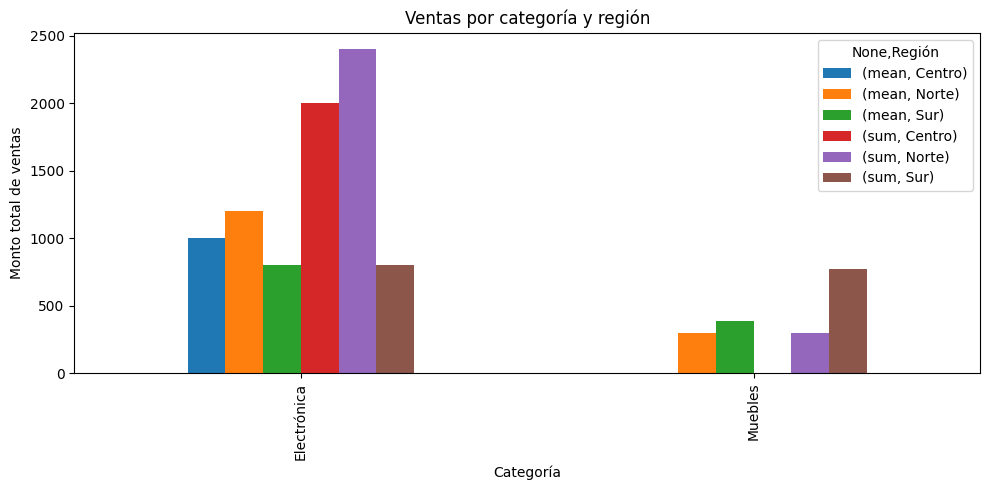

In [100]:
# 4. Visualizar resultados
import matplotlib.pyplot as plt
reporte_regiones.plot(kind='bar', figsize=(10, 5))
plt.title('Ventas por categoría y región')
plt.ylabel('Monto total de ventas')
plt.tight_layout()
plt.show()

<h3>Ejercicio práctico: Análisis de ventas por trimestre</h3>

In [101]:
# Datos de ejemplo
data = { 'Fecha': pd.date_range(start='2023-01-01', periods=12, freq='ME'), 
         'Producto': ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B'], 
         'Ventas': [100, 150, 120, 180, 90, 160, 110, 190, 130, 200, 140, 210]}
df = pd.DataFrame(data)
df

,Fecha,Producto,Ventas
0,2023-01-31,A,100
1,2023-02-28,B,150
2,2023-03-31,A,120
3,2023-04-30,B,180
4,2023-05-31,A,90
5,2023-06-30,B,160
6,2023-07-31,A,110
7,2023-08-31,B,190
8,2023-09-30,A,130
9,2023-10-31,B,200


In [102]:
# Añadir columna de trimestre
df['Trimestre'] = df['Fecha'].dt.quarter

In [103]:
df

,Fecha,Producto,Ventas,Trimestre
0,2023-01-31,A,100,1
1,2023-02-28,B,150,1
2,2023-03-31,A,120,1
3,2023-04-30,B,180,2
4,2023-05-31,A,90,2
5,2023-06-30,B,160,2
6,2023-07-31,A,110,3
7,2023-08-31,B,190,3
8,2023-09-30,A,130,3
9,2023-10-31,B,200,4


In [104]:
# Agrupar por trimestre y producto
ventas_trim = df.groupby(['Trimestre', 'Producto'])['Ventas'].sum().reset_index()
ventas_trim

,Trimestre,Producto,Ventas
0,1,A,220
1,1,B,150
2,2,A,90
3,2,B,340
4,3,A,240
5,3,B,190
6,4,A,140
7,4,B,410


In [105]:
# Pivotar para crear informe
informe = ventas_trim.pivot(index='Trimestre', columns='Producto', values='Ventas')
informe

Producto,A,B
Trimestre,,
1,220,150
2,90,340
3,240,190
4,140,410


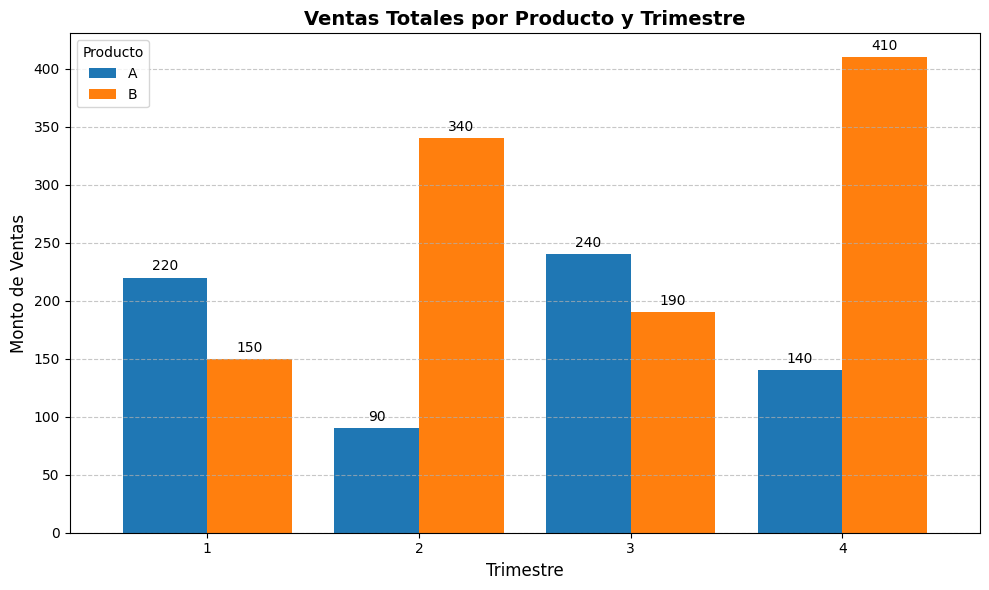

In [106]:
import matplotlib.pyplot as plt

# 1. Graficar el informe
# Usamos un gráfico de barras para comparar productos por trimestre
ax = informe.plot(kind='bar', figsize=(10, 6), width=0.8)

# 2. Personalizar el diseño
plt.title('Ventas Totales por Producto y Trimestre', fontsize=14, fontweight='bold')
plt.xlabel('Trimestre', fontsize=12)
plt.ylabel('Monto de Ventas', fontsize=12)
plt.xticks(rotation=0) # Mantiene los números 1, 2, 3, 4 en posición horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añade líneas guía horizontales
plt.legend(title='Producto')

# 3. Añadir etiquetas de datos sobre las barras (opcional pero muy útil)
for container in ax.containers:
    ax.bar_label(container, padding=3)

# 4. Mostrar el gráfico
plt.tight_layout()
plt.show()

<h3>Caso de uso: Análisis de datos financieros</h3>

In [107]:
import pandas as pd
import numpy as np

# 1. Dataset de INSTRUMENTOS (Clasificación por sector)
instrumentos = pd.DataFrame({
    'ID_Instrumento': [101, 102, 103, 104],
    'Simbolo': ['AAPL', 'MSFT', 'JPM', 'GS'],
    'Sector': ['Tecnología', 'Tecnología', 'Finanzas', 'Finanzas']
})

# Generamos un rango de fechas para los datos históricos
fechas = pd.date_range(start='2023-01-01', periods=100, freq='D')

# 2. Dataset de TRANSACCIONES (Precios simulados)
data_list = []
for idx in instrumentos['ID_Instrumento']:
    precios = np.random.normal(loc=150 if idx < 103 else 200, scale=5, size=len(fechas)).tolist()
    for fecha, precio in zip(fechas, precios):
        data_list.append({'Fecha': fecha, 'ID_Instrumento': idx, 'Precio': precio})

transacciones = pd.DataFrame(data_list)

# 3. Dataset MACRO_DATA (Variables externas como inflación o tasas)
macro_data = pd.DataFrame({
    'Fecha': fechas,
    'Inflacion': np.random.uniform(3.0, 5.0, size=len(fechas)),
    'Tasa_Interes': np.random.uniform(0.25, 5.0, size=len(fechas))
})

In [108]:
# 1. Combinar datos
df_completo = pd.merge(transacciones, instrumentos, on='ID_Instrumento')
df_completo = pd.merge(df_completo, macro_data, on='Fecha', how='left')
df_completo

,Fecha,ID_Instrumento,Precio,Simbolo,Sector,Inflacion,Tasa_Interes
0,2023-01-01,101,145.519113,AAPL,Tecnología,3.100557,2.567058
1,2023-01-02,101,151.185992,AAPL,Tecnología,3.433498,0.917275
2,2023-01-03,101,141.610482,AAPL,Tecnología,4.653991,2.147016
3,2023-01-04,101,142.393927,AAPL,Tecnología,4.258979,3.615427
4,2023-01-05,101,154.849260,AAPL,Tecnología,4.398520,3.787312
...,...,...,...,...,...,...,...
395,2023-04-06,104,188.445778,GS,Finanzas,4.947452,3.615911
396,2023-04-07,104,195.905364,GS,Finanzas,3.982687,0.278616
397,2023-04-08,104,203.214644,GS,Finanzas,3.289653,1.219794
398,2023-04-09,104,204.210692,GS,Finanzas,4.097147,3.268095


In [109]:
# 2. Calcular rendimiento diario
df_completo['Rendimiento'] = df_completo.groupby('ID_Instrumento')['Precio'].pct_change()
df_completo


,Fecha,ID_Instrumento,Precio,Simbolo,Sector,Inflacion,Tasa_Interes,Rendimiento
0,2023-01-01,101,145.519113,AAPL,Tecnología,3.100557,2.567058,NaN
1,2023-01-02,101,151.185992,AAPL,Tecnología,3.433498,0.917275,0.038943
2,2023-01-03,101,141.610482,AAPL,Tecnología,4.653991,2.147016,-0.063336
3,2023-01-04,101,142.393927,AAPL,Tecnología,4.258979,3.615427,0.005532
4,2023-01-05,101,154.849260,AAPL,Tecnología,4.398520,3.787312,0.087471
...,...,...,...,...,...,...,...,...
395,2023-04-06,104,188.445778,GS,Finanzas,4.947452,3.615911,-0.022643
396,2023-04-07,104,195.905364,GS,Finanzas,3.982687,0.278616,0.039585
397,2023-04-08,104,203.214644,GS,Finanzas,3.289653,1.219794,0.037310
398,2023-04-09,104,204.210692,GS,Finanzas,4.097147,3.268095,0.004901


In [110]:
# 3. Agrupar por sector y mes
df_completo['Mes'] = df_completo['Fecha'].dt.to_period('M')
rendimiento_sector = df_completo.groupby(['Sector', 'Mes'])['Rendimiento'].mean().reset_index()

In [111]:
# 4. Pivotar para comparar sectores
comparativa = rendimiento_sector.pivot(index='Mes', columns='Sector', values='Rendimiento')
comparativa

Sector,Finanzas,Tecnología
Mes,,
2023-01,0.001269,0.001412
2023-02,0.000409,0.000748
2023-03,0.000382,0.001734
2023-04,0.002341,0.002800


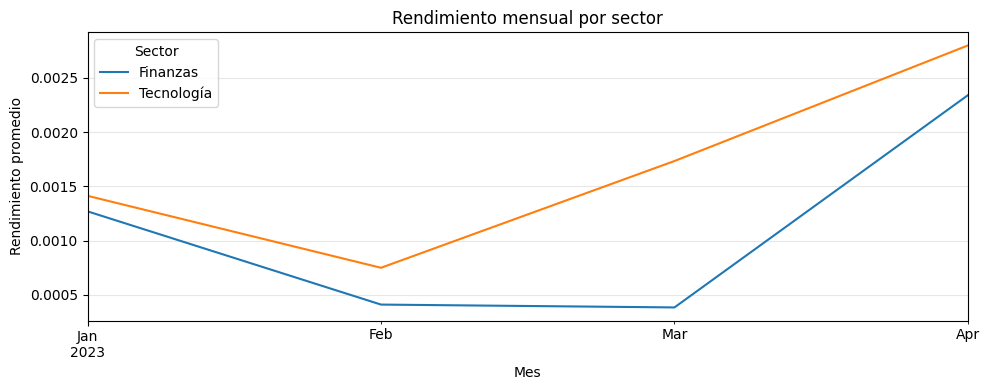

In [112]:
# 5. Visualizar tendencias
import matplotlib.pyplot as plt
comparativa.plot(figsize=(10, 4))
plt.title('Rendimiento mensual por sector')
plt.ylabel('Rendimiento promedio')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

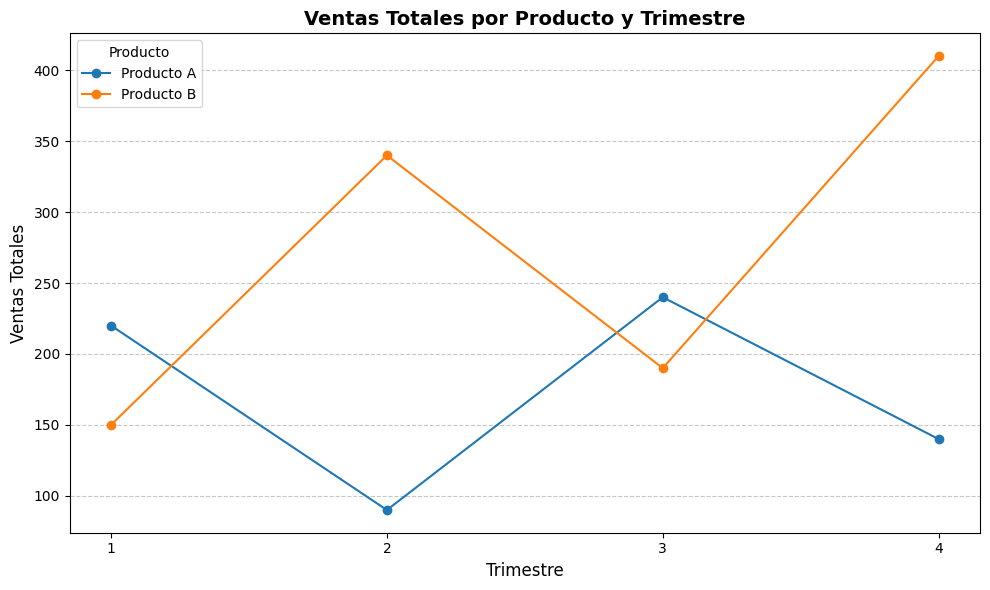

In [113]:
# Graficar las ventas totales por trimestre para cada producto
plt.figure(figsize=(10, 6))
for producto in informe.columns:
    plt.plot(informe.index, informe[producto], marker='o', label=f'Producto {producto}')

# Personalizar el gráfico
plt.title('Ventas Totales por Producto y Trimestre', fontsize=14, fontweight='bold')
plt.xlabel('Trimestre', fontsize=12)
plt.ylabel('Ventas Totales', fontsize=12)
plt.xticks(informe.index, rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Producto')

# Mostrar el gráfico
plt.tight_layout()
plt.show()